In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from eval import loadPrices

Loaded 50 instruments for 500 days
Day 250 value: -23.79 todayPL: $-23.79 $-traded: 23790 return: -0.00100
Day 251 value: -86.08 todayPL: $-62.29 $-traded: 48793 return: -0.00176
Day 252 value: -109.18 todayPL: $-23.10 $-traded: 72720 return: -0.00150
Day 253 value: -123.23 todayPL: $-14.05 $-traded: 97808 return: -0.00126
Day 254 value: -120.46 todayPL: $2.76 $-traded: 122814 return: -0.00098
Day 255 value: -14.49 todayPL: $105.97 $-traded: 143803 return: -0.00010
Day 256 value: -19.16 todayPL: $-4.66 $-traded: 166776 return: -0.00011
Day 257 value: -80.93 todayPL: $-61.77 $-traded: 189951 return: -0.00043
Day 258 value: -171.97 todayPL: $-91.04 $-traded: 215583 return: -0.00080
Day 259 value: -123.18 todayPL: $48.79 $-traded: 238044 return: -0.00052
Day 260 value: -271.54 todayPL: $-148.35 $-traded: 261668 return: -0.00104
Day 261 value: -222.76 todayPL: $48.78 $-traded: 284770 return: -0.00078
Day 262 value: -133.62 todayPL: $89.14 $-traded: 306173 return: -0.00044
Day 263 value: -2

In [3]:
prices_df = loadPrices("prices.txt")
(nInst, nt) = prices_df.shape

In [4]:
stocks = []
prices = []
days = list(range(nt))*nInst
for stock in range(50):
    stocks += [stock]*nt
    prices += list(prices_df[stock])
df = pd.DataFrame({"DAY": days, "STOCK":stocks, "PRICE":prices})
#df = df.sort_values(by=["DAY", "STOCK"])
df = df.reset_index(drop=True)
    

In [7]:
## Calculate log returns
df["RETURN"] = df.groupby('STOCK')['PRICE'].pct_change()
df['LOG_RETURN'] = np.log(df.groupby('STOCK')['PRICE'].pct_change()+1)


In [8]:
df.to_csv("Price_data.csv", index=False)

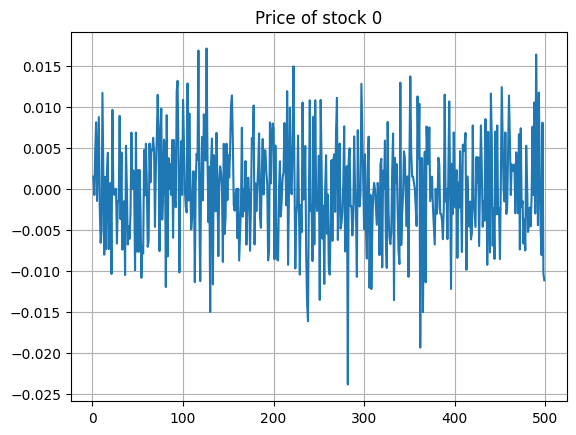

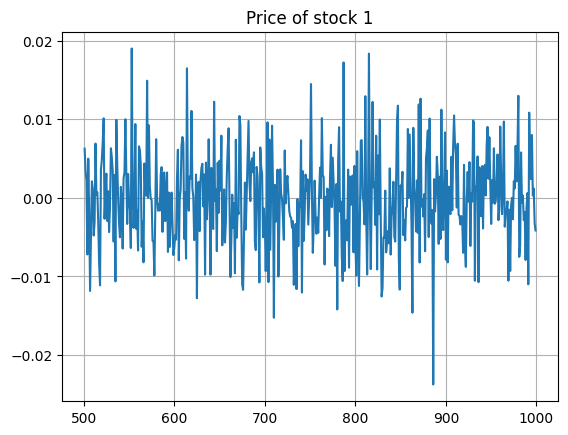

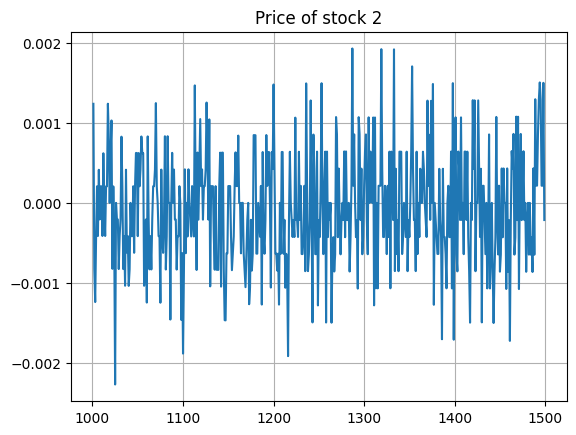

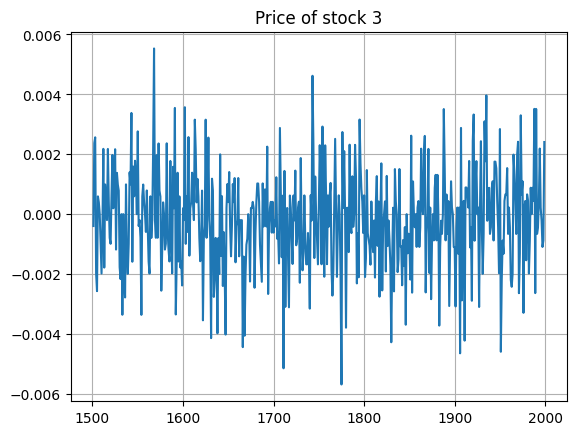

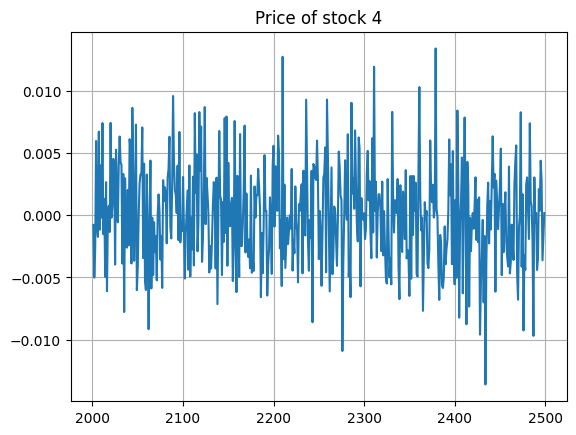

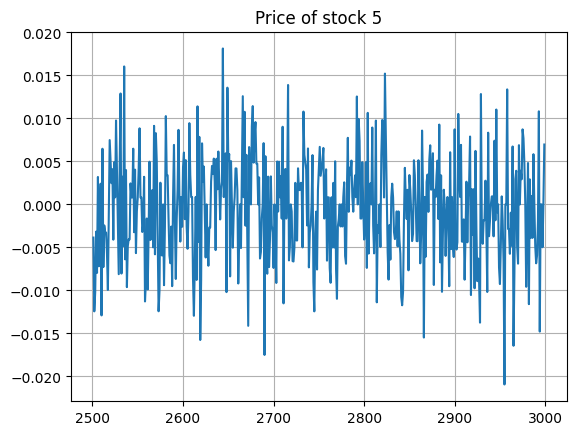

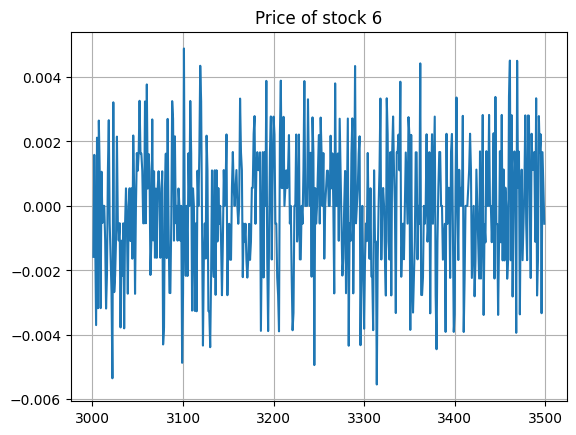

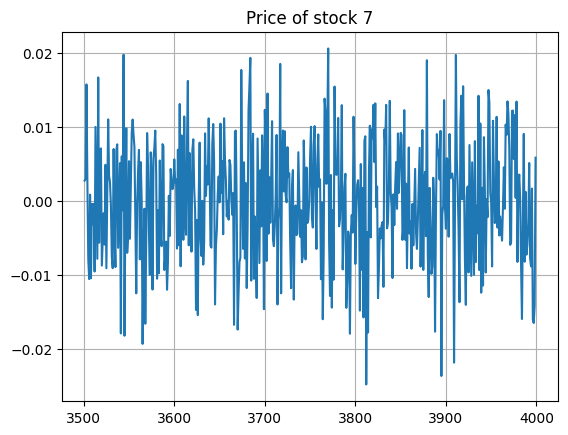

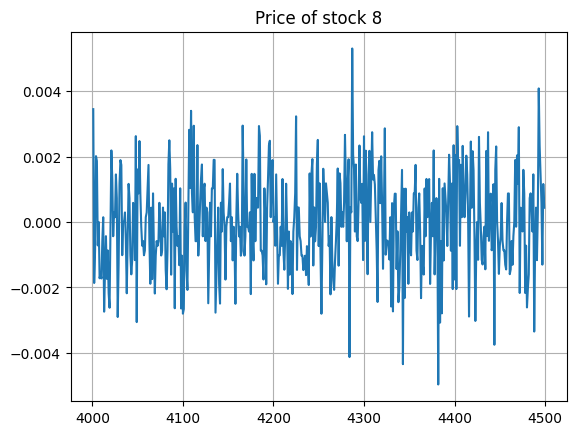

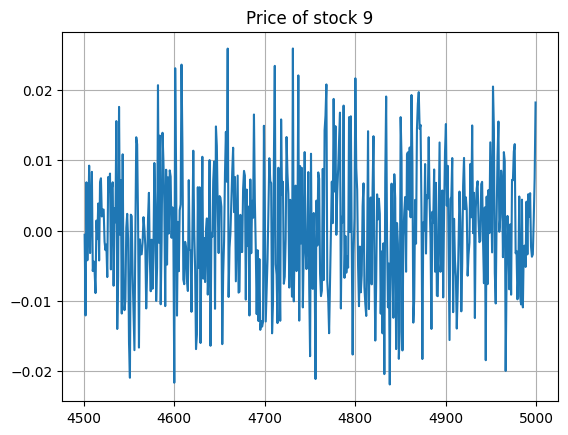

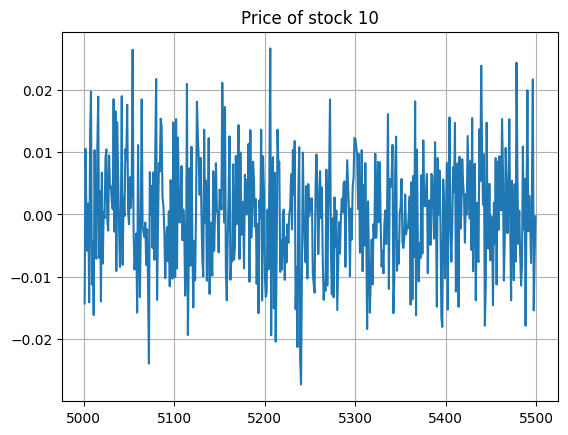

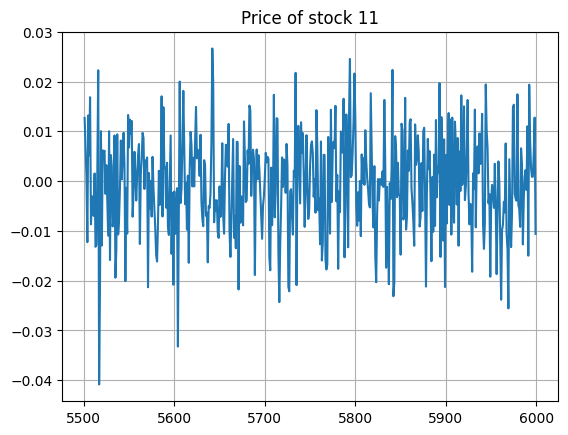

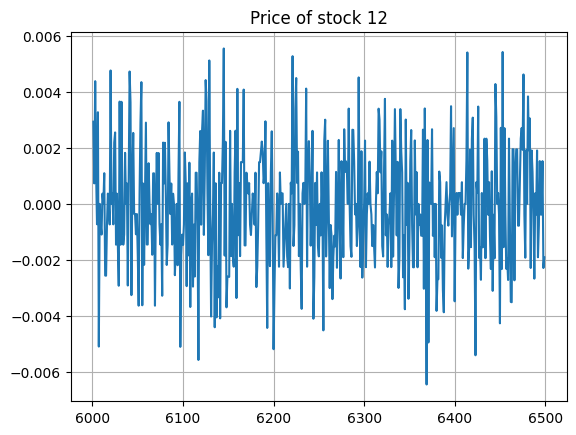

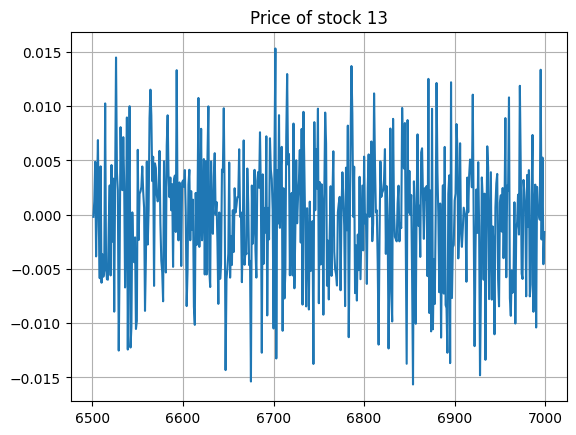

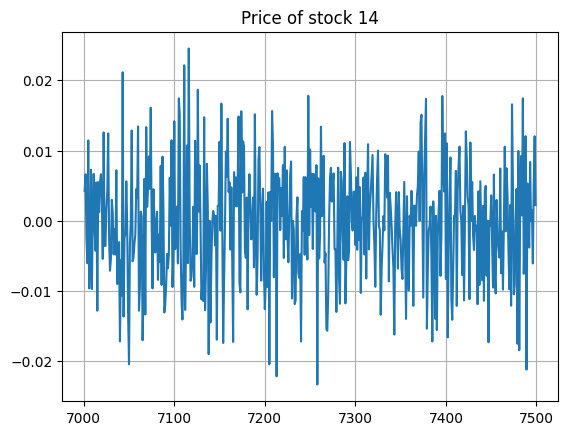

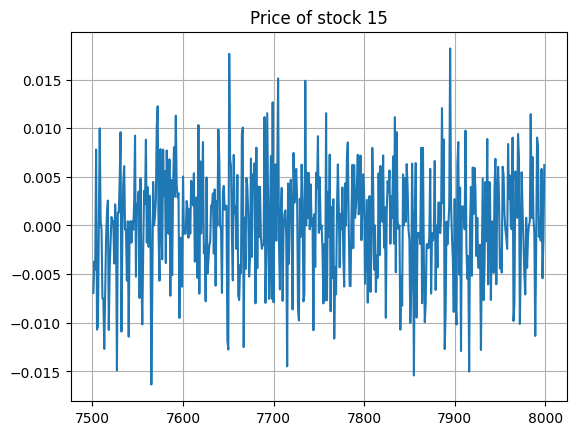

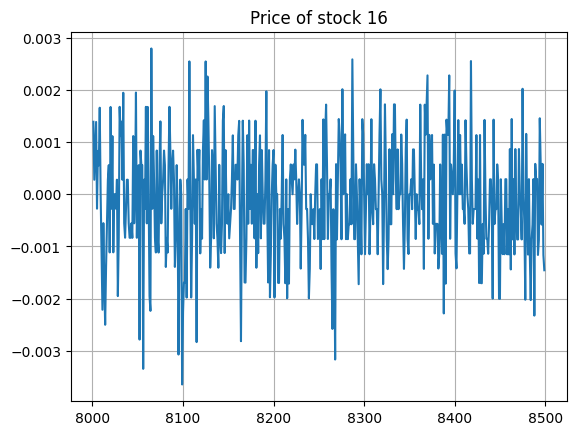

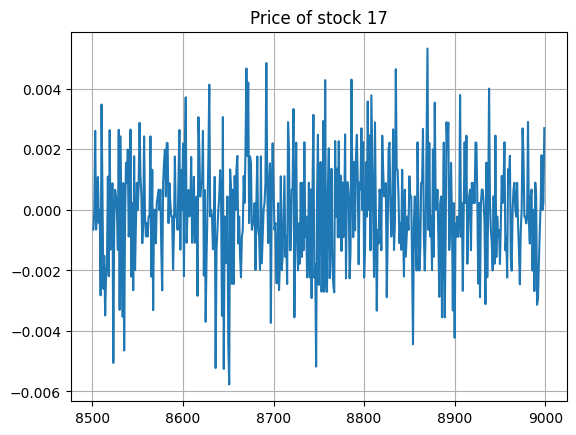

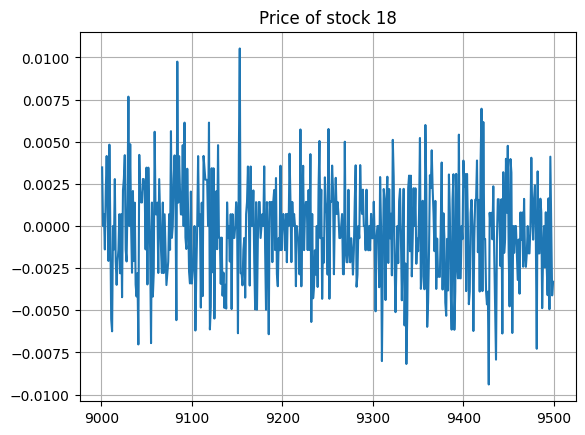

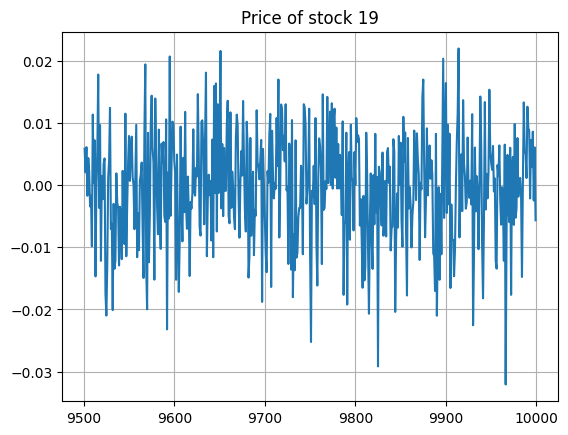

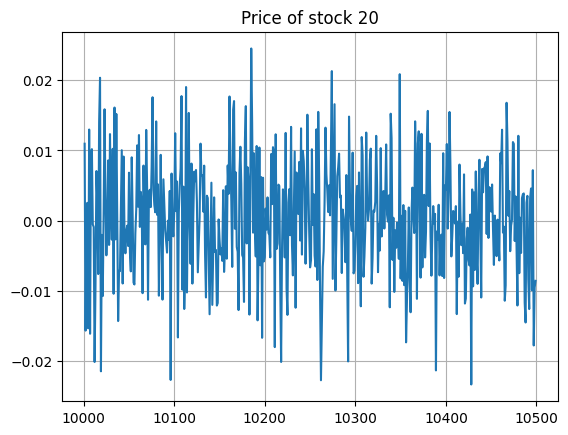

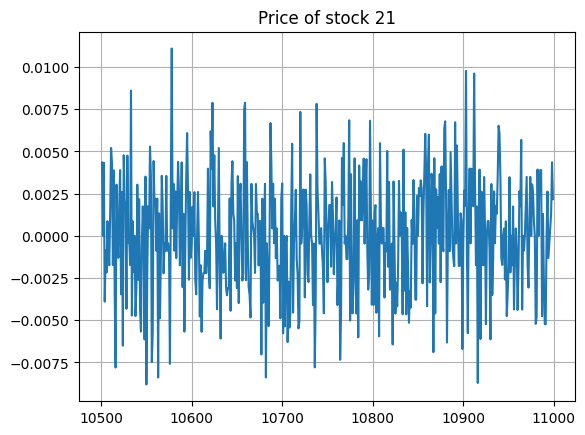

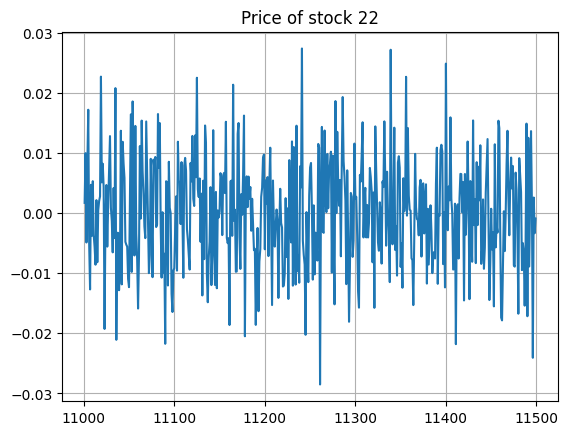

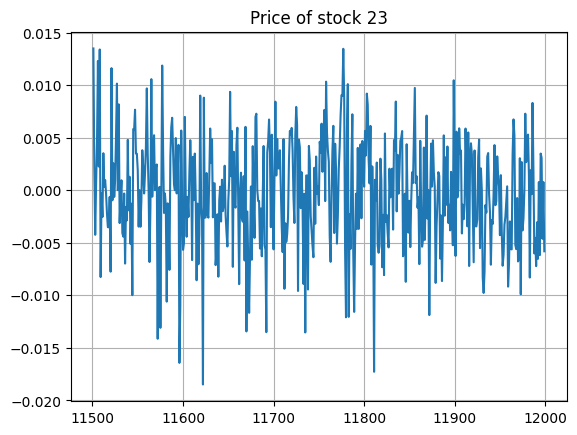

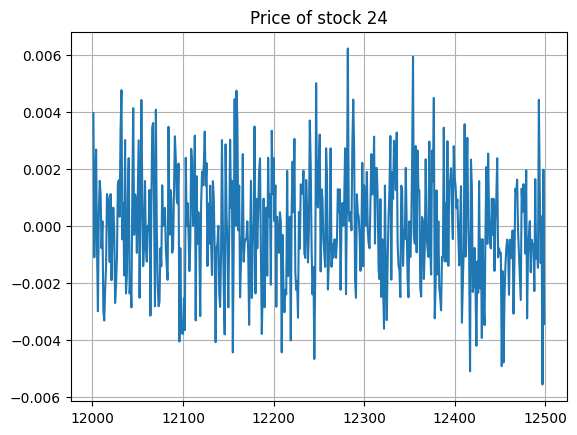

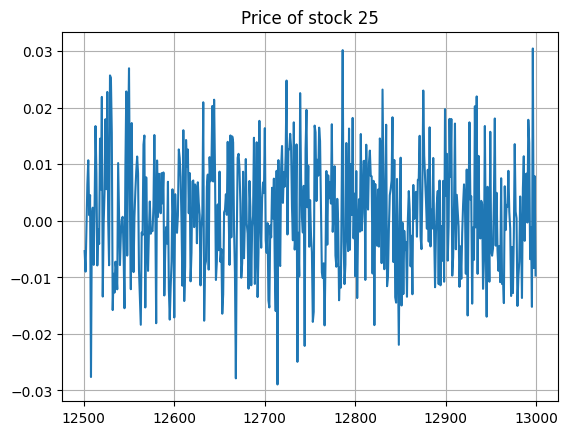

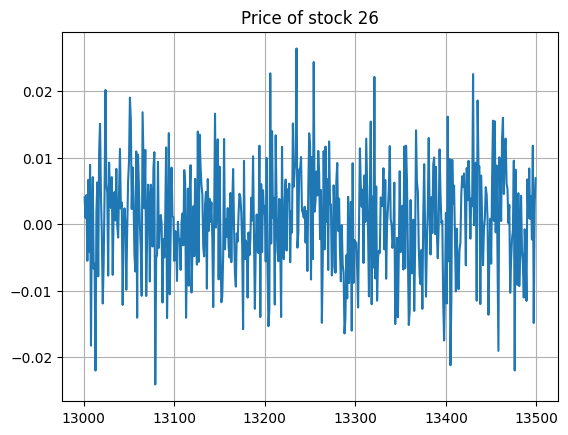

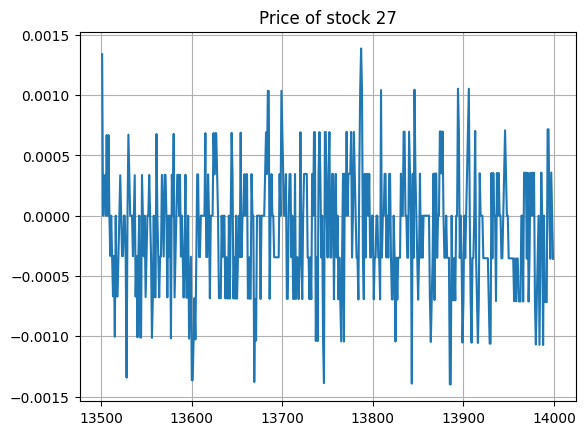

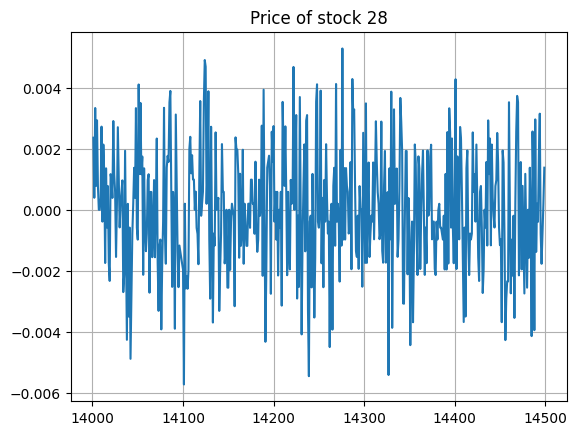

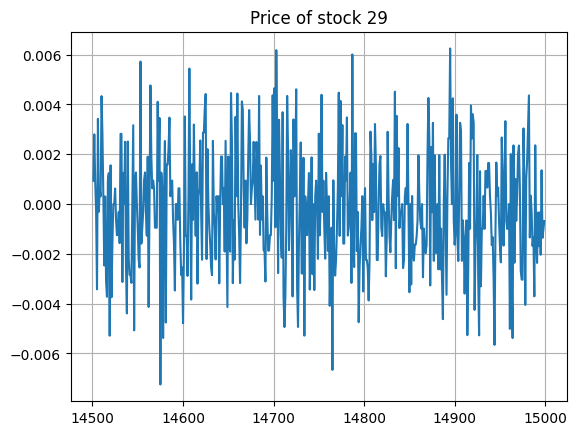

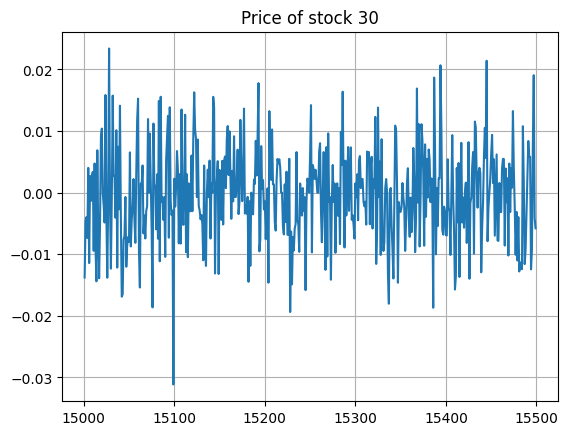

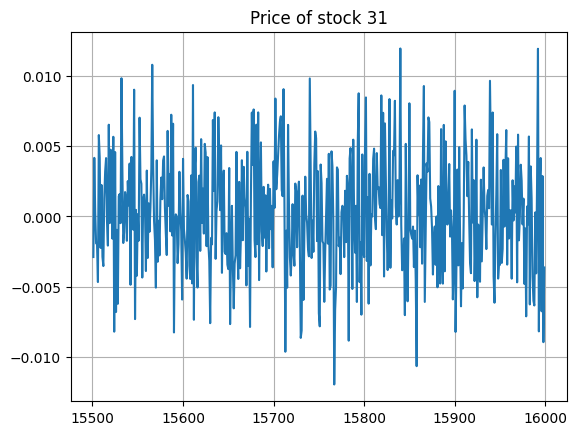

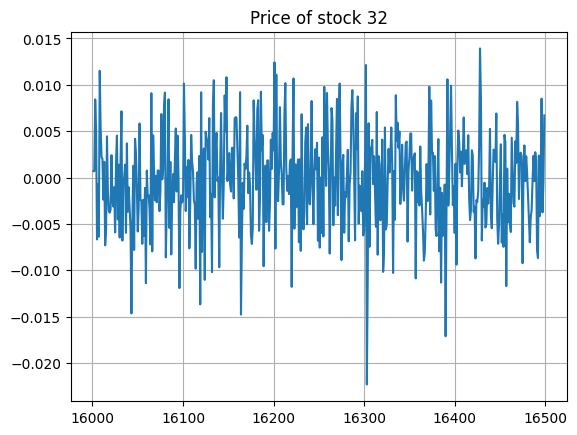

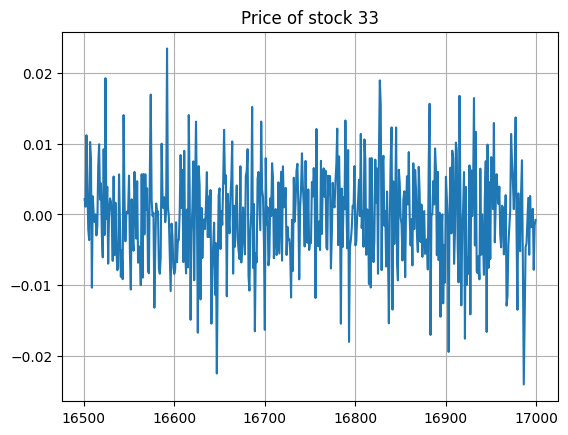

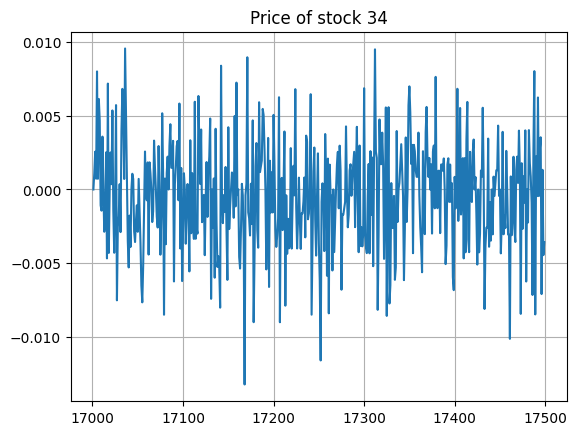

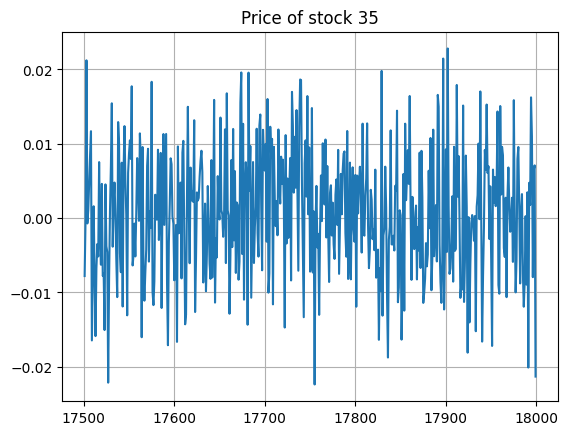

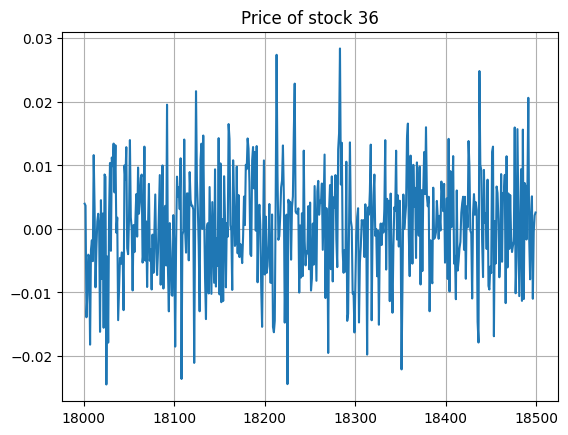

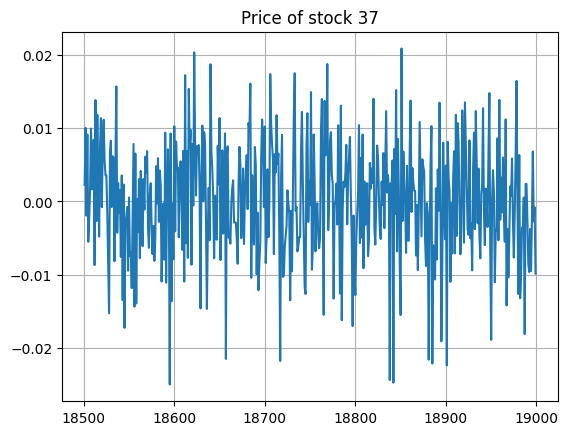

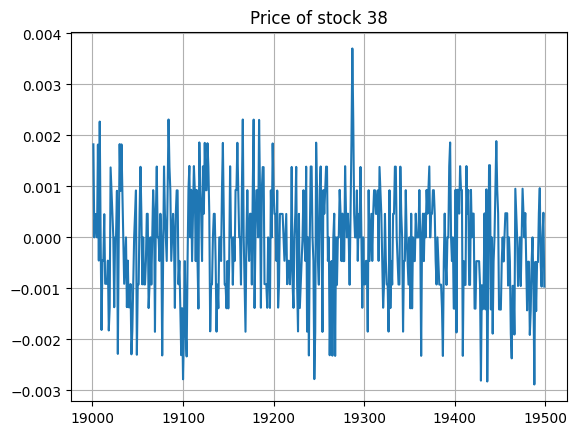

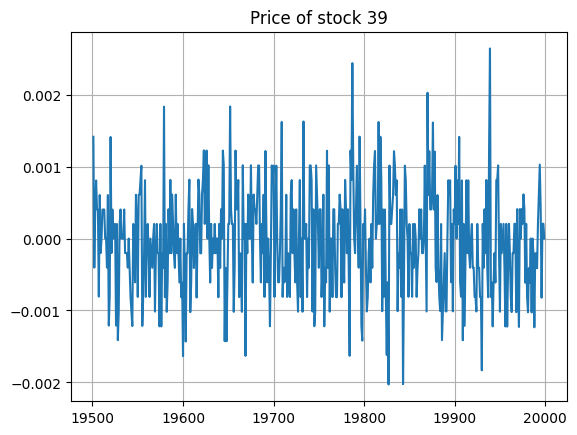

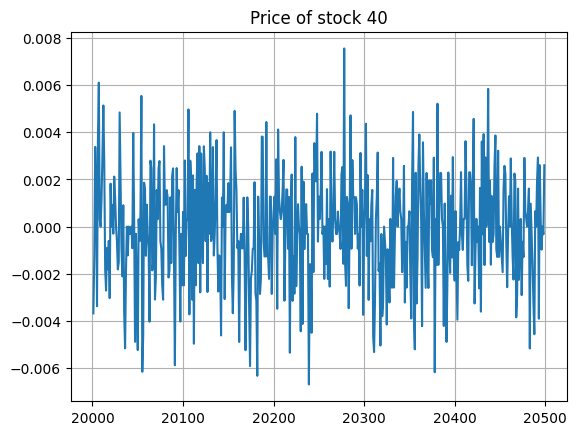

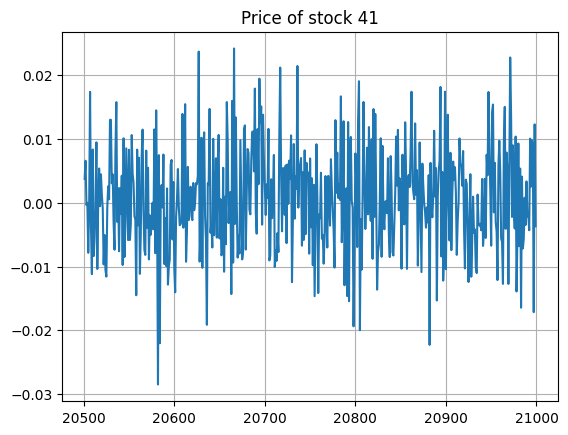

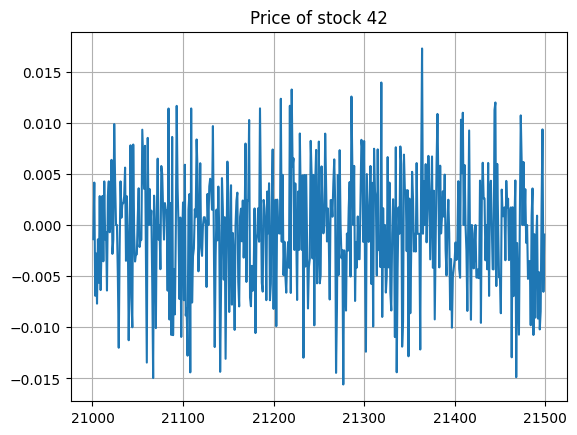

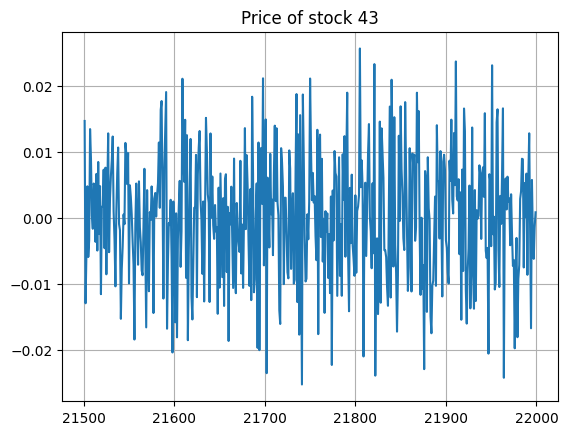

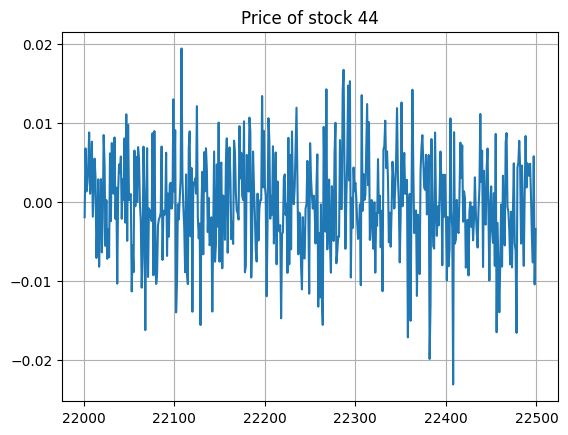

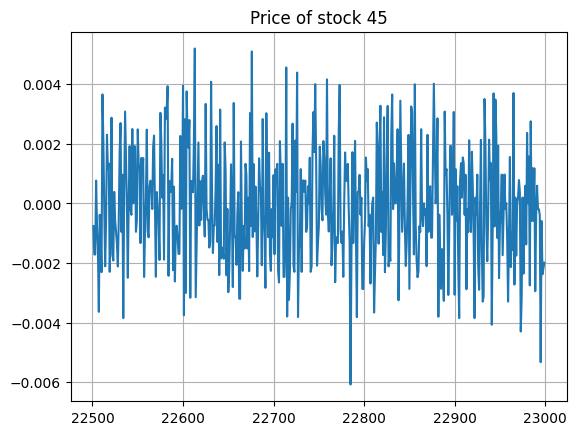

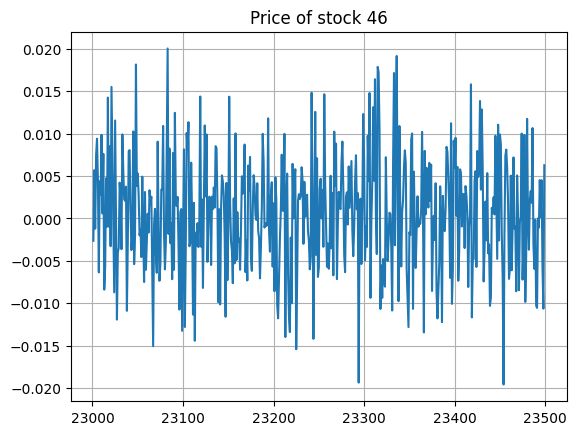

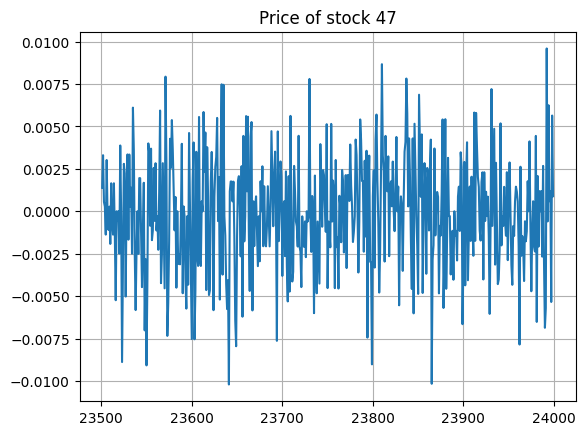

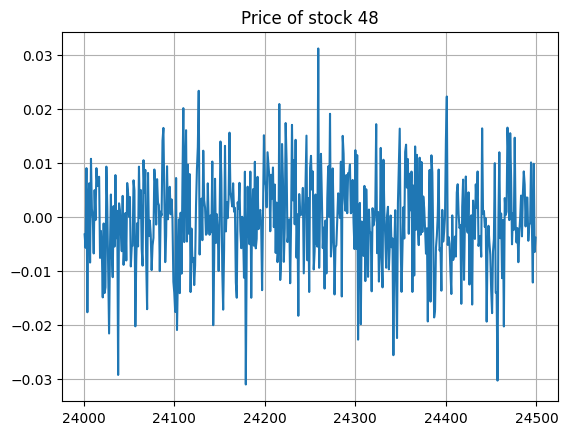

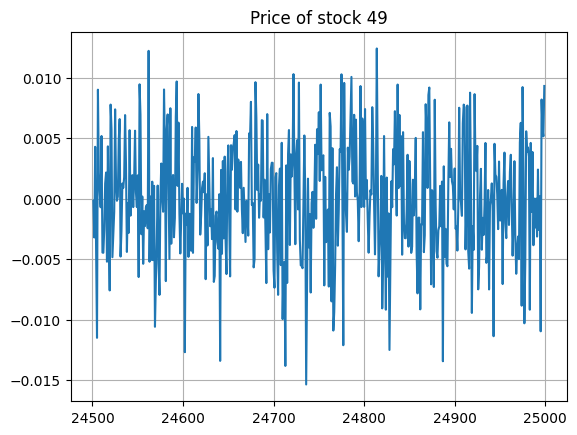

In [33]:
for stock in range(50):
    prices = df.loc[df["STOCK"]==stock, "LOG_RETURN"]
    plt.plot(prices)
    plt.grid(True)
    plt.title(f"Price of stock {stock}")
    plt.show()


In [93]:
prices_df = pd.DataFrame(prices_df.T)
stock_names = [f'stock{i}' for i in range(prices_df.shape[1])]
prices_df.columns = stock_names
for stock in stock_names:
    prices_df[f'{stock}_log_return'] = np.log(prices_df[stock].pct_change() + 1)